# Submission NLP
Nama : Zaki Anwar Farizan

In [13]:
import pandas as pd
df = pd.read_csv('emotion_dataset.txt', names=['sentence', 'emotion'], sep=';')

In [14]:
df.tail()

,sentence,emotion
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger
15999,i know a lot but i feel so stupid because i ca...,sadness


In [15]:
# One Hot Encoding on Label
category = pd.get_dummies(df.emotion)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='emotion')
df_baru

,sentence,anger,fear,joy,love,sadness,surprise
0,i didnt feel humiliated,0,0,0,0,1,0
1,i can go from feeling so hopeless to so damned...,0,0,0,0,1,0
2,im grabbing a minute to post i feel greedy wrong,1,0,0,0,0,0
3,i am ever feeling nostalgic about the fireplac...,0,0,0,1,0,0
4,i am feeling grouchy,1,0,0,0,0,0
...,...,...,...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,0,0,0,0,1,0
15996,i am now turning and i feel pathetic that i am...,0,0,0,0,1,0
15997,i feel strong and good overall,0,0,1,0,0,0
15998,i feel like this was such a rude comment and i...,1,0,0,0,0,0


In [16]:
kalimat = df_baru['sentence'].values
emosi = df_baru[['anger','fear','joy','love','sadness','surprise']].values

In [17]:
from sklearn.model_selection import train_test_split
kalimat_latih, kalimat_test, emosi_latih, emosi_test = train_test_split(kalimat, emosi, test_size=0.2)

In [18]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(kalimat_latih) 
 
sekuens_latih = tokenizer.texts_to_sequences(kalimat_latih)
sekuens_test = tokenizer.texts_to_sequences(kalimat_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

In [19]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 16)          80000     
                                                                 
 lstm_1 (LSTM)               (None, 64)                20736     
                                                                 
 dense_3 (Dense)             (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 6)                

In [21]:
num_epochs = 30
history = model.fit(padded_latih, emosi_latih, epochs=num_epochs, 
                    validation_data=(padded_test, emosi_test), verbose=2)

Epoch 1/30
400/400 - 4s - loss: 1.4809 - accuracy: 0.3477 - val_loss: 1.1569 - val_accuracy: 0.4519 - 4s/epoch - 11ms/step
Epoch 2/30
400/400 - 2s - loss: 0.9479 - accuracy: 0.5872 - val_loss: 0.8073 - val_accuracy: 0.6806 - 2s/epoch - 6ms/step
Epoch 3/30
400/400 - 2s - loss: 0.5870 - accuracy: 0.7635 - val_loss: 0.6360 - val_accuracy: 0.7850 - 2s/epoch - 6ms/step
Epoch 4/30
400/400 - 2s - loss: 0.4151 - accuracy: 0.8478 - val_loss: 0.5379 - val_accuracy: 0.8188 - 2s/epoch - 6ms/step
Epoch 5/30
400/400 - 2s - loss: 0.2982 - accuracy: 0.9027 - val_loss: 0.5024 - val_accuracy: 0.8487 - 2s/epoch - 6ms/step
Epoch 6/30
400/400 - 2s - loss: 0.2192 - accuracy: 0.9299 - val_loss: 0.4079 - val_accuracy: 0.8750 - 2s/epoch - 6ms/step
Epoch 7/30
400/400 - 2s - loss: 0.1769 - accuracy: 0.9455 - val_loss: 0.3737 - val_accuracy: 0.8938 - 2s/epoch - 6ms/step
Epoch 8/30
400/400 - 2s - loss: 0.1285 - accuracy: 0.9601 - val_loss: 0.4188 - val_accuracy: 0.8959 - 2s/epoch - 6ms/step
Epoch 9/30
400/400 - 3s

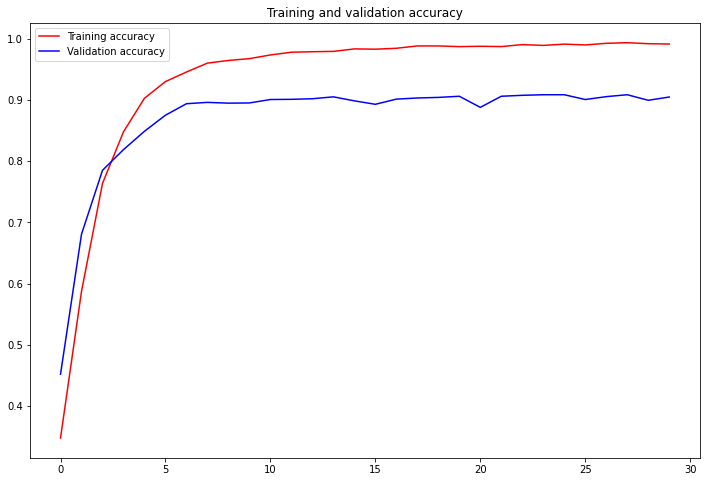

In [22]:
import matplotlib.pyplot as plt

accur = history.history['accuracy']
val_accur = history.history['val_accuracy'] 
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accur))

plt.figure(figsize=(12,8))
plt.plot(epochs, accur, 'r', label='Training accuracy')
plt.plot(epochs, val_accur, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.show()

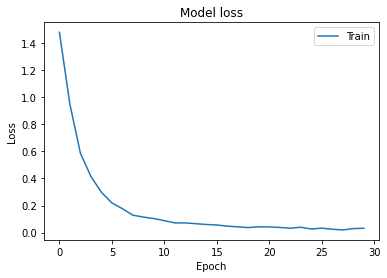

In [23]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()